Importing necessary libraries and modules

In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

Loading the data

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


<Figure size 432x288 with 0 Axes>

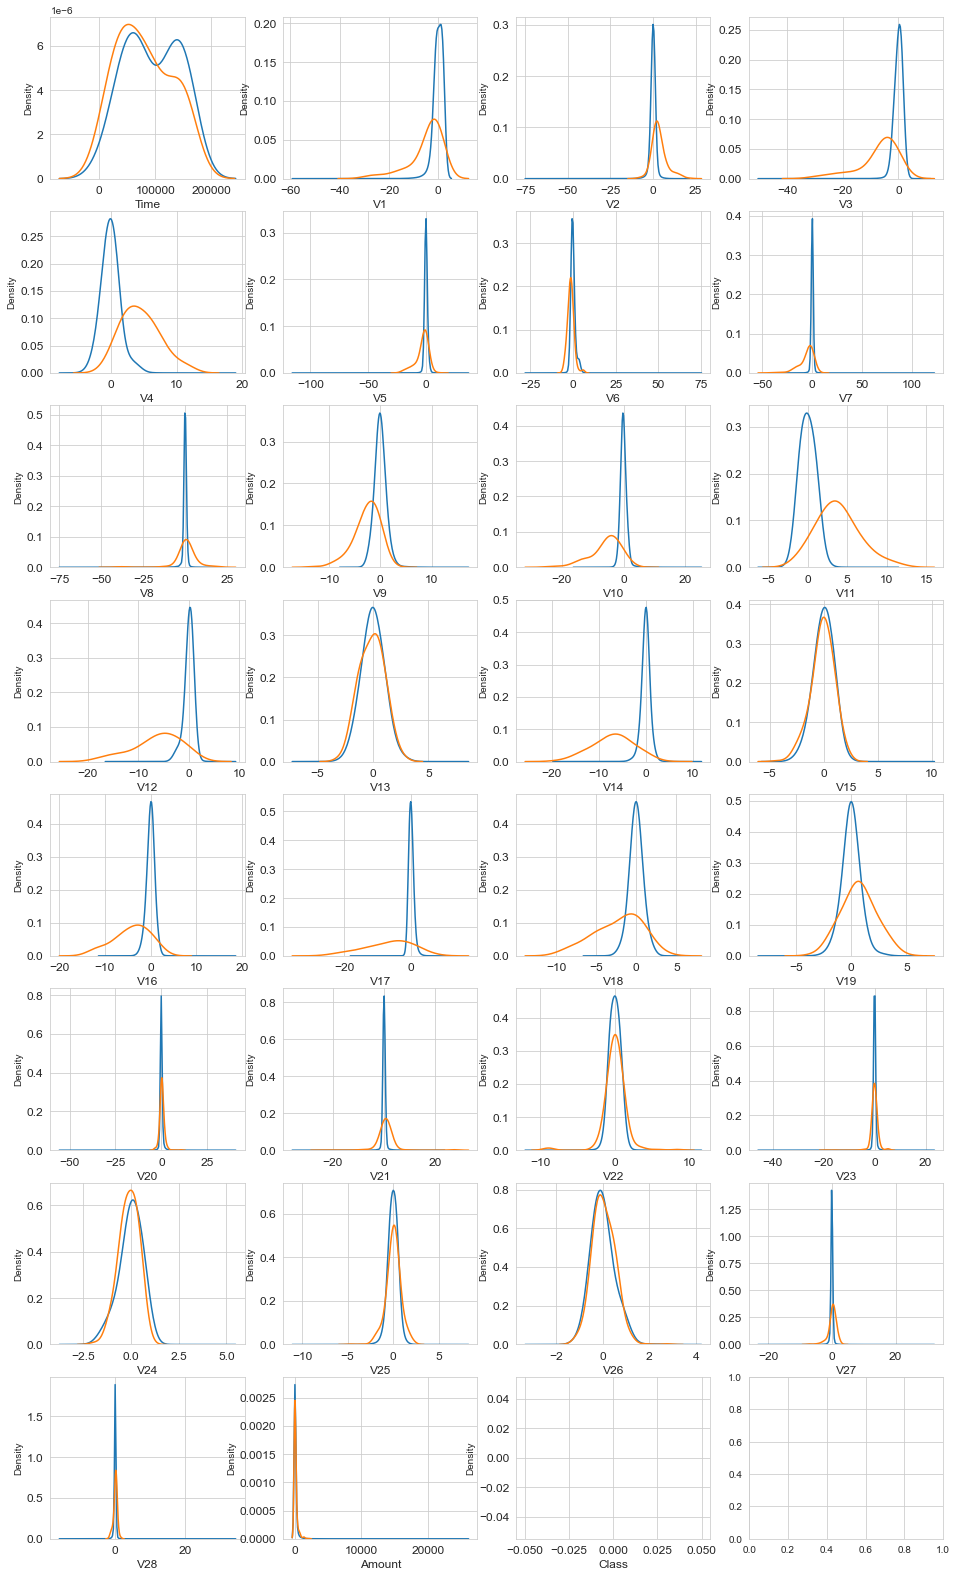

In [4]:
var = data.columns.values
i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [5]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data.drop(['Time'], axis=1, inplace=True)

We have dropped the 'time' feature as it is irrelevant for our models. Also, duplicate values are removed.

Next, we define dependent and independent variables.

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [8]:
#DECISION TREE CLASSIFIER
DT = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_ypred = DT.predict(X_test)

In [12]:
#Accuracy and F1 score of Decision tree classifier
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_ypred)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_ypred)))
#
print("CONFUSION MATRIX FOR DECISION TREE MODEL")
confusion_matrix(y_test, dt_ypred, labels = [0, 1])

Accuracy score of the Decision Tree model is 0.9993107576224766
F1 score of the Decision Tree model is 0.8020833333333333
CONFUSION MATRIX FOR DECISION TREE MODEL


array([[55018,    13],
       [   25,    77]])

In [13]:
#K-nearest neighbors classifier
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train, y_train)
knn_ypred = KNN.predict(X_test)

In [14]:
#Accuracy and F1 score of KNN classifier
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_ypred)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_ypred)))
print("CONFUSION MATRIX FOR KNN MODEL")
confusion_matrix(y_test, knn_ypred, labels = [0, 1])

Accuracy score of the K-Nearest Neighbors model is 0.9993288955797798
F1 score of the K-Nearest Neighbors model is 0.8021390374331552
CONFUSION MATRIX FOR KNN MODEL


array([[55021,    10],
       [   27,    75]])

In [15]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_ypred = lr.predict(X_test)

In [16]:
#Accuracy and F1 score of Logistic Regression classifier
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_ypred)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_ypred)))
print("CONFUSION MATRIX FOR LOGISTIC REGRESSION MODEL")
confusion_matrix(y_test, lr_ypred, labels = [0, 1])

Accuracy score of the Logistic Regression model is 0.9990024123483213
F1 score of the Logistic Regression model is 0.6892655367231638
CONFUSION MATRIX FOR LOGISTIC REGRESSION MODEL


array([[55017,    14],
       [   41,    61]])

In [17]:
#Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)

In [20]:
#Accuracy and F1 score of SVM
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_ypred)))
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_ypred)))
print("CONFUSION MATRIX FOR SVM MODEL")
confusion_matrix(y_test, svm_ypred, labels = [0, 1])

Accuracy score of the Support Vector Machines model is 0.9993288955797798
F1 score of the Support Vector Machines model is 0.7861271676300577
CONFUSION MATRIX FOR SVM MODEL


array([[55028,     3],
       [   34,    68]])

In [19]:
#Random Forest
rf = RandomForestClassifier(max_depth = 3)
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

In [21]:
#Accuracy and F1 score of Random Forest classifier
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_ypred)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_ypred)))
print("CONFUSION MATRIX FOR RANDOM FOREST MODEL")
confusion_matrix(y_test, rf_ypred, labels = [0, 1])

Accuracy score of the Random Forest model is 0.9990024123483213
F1 score of the Random Forest model is 0.6927374301675977
CONFUSION MATRIX FOR RANDOM FOREST MODEL


array([[55016,    15],
       [   40,    62]])

In [22]:
#XG_boost classifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_ypred = xgb.predict(X_test)

[22:43:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
#Accuracy and F1 score of XG-boost classifier
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_ypred)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_ypred)))
print("CONFUSION MATRIX FOR XG-BOOST MODEL")
confusion_matrix(y_test, xgb_ypred, labels = [0, 1])

Accuracy score of the XGBoost model is 0.9994558612809026
F1 score of the XGBoost model is 0.8333333333333333
CONFUSION MATRIX FOR XG-BOOST MODEL


array([[55028,     3],
       [   27,    75]])

# END OF CODE